In [ ]:
from log_helper.log_helper import LogHelper
from datetime import datetime
from pytz import timezone

import os
import pathlib
import logging

In [ ]:
##################################################################################################
# Setup logger and output dir                                                                    #
##################################################################################################
output_dir = 'log/test-{}'.format(datetime.now(timezone('Asia/Seoul')).strftime('%Y-%m-%d_%H-%M-%S-%f')[:-3])
if not os.path.exists(output_dir):
    pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

# Setup logger
LogHelper.setup(log_path='{}/test.log'.format(output_dir), log_level=logging.INFO)
_logger = logging.getLogger(__name__)

In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils

%load_ext autoreload
%autoreload 2

In [2]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

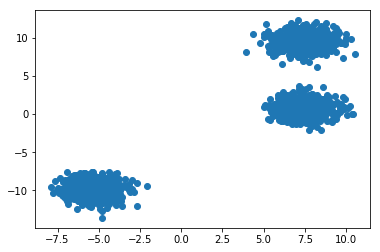

In [10]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [14]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['DBSCAN', 'KMeans'], n_evaluations=50)

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {DBSCAN, KMeans}, Default: DBSCAN
    eps___DBSCAN, Type: UniformFloat, Range: [0.01, 10.0], Default: 0.01
    min_samples___DBSCAN, Type: UniformInteger, Range: [5, 1000], Default: 5
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    eps___DBSCAN | algorithm_choice in {'DBSCAN'}
    min_samples___DBSCAN | algorithm_choice in {'DBSCAN'}
    n_clusters___KMeans | algorithm_choice in {'KMeans'}

Optimization is complete, the optimal configuration is Configuration:
  algorithm_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 3



In [15]:
opt_result

Configuration:
  algorithm_choice, Value: 'KMeans'
  n_clusters___KMeans, Value: 3

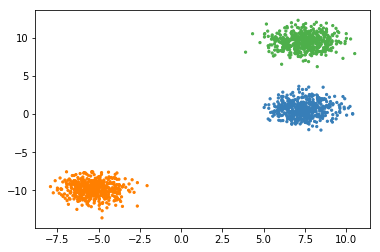

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)

In [16]:
autocluster.predict(X)

In [17]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 0.01
   min_samples___DBSCAN, Value: 5
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0001423358917236328),
 TrajEntry(train_perf=0.8516401811599096, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'DBSCAN'
   eps___DBSCAN, Value: 0.01
   min_samples___DBSCAN, Value: 5
 , ta_runs=1, ta_time_used=0.11316299438476562, wallclock_time=0.12346172332763672),
 TrajEntry(train_perf=-0.8104321767519068, incumbent_id=2, incumbent=Configuration:
   algorithm_choice, Value: 'KMeans'
   n_clusters___KMeans, Value: 3
 , ta_runs=3, ta_time_used=0.3162569999694824, wallclock_time=0.5016040802001953)]